In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from aranha_maps_class import VelocityMaps

In [2]:
Velmap = fits.open('/home/juan/PROYECTOS/PYKINEMETRY/Test/Fit_realvelmaps/ugc8334_rv_voro.fits')[0].data

# UGC8334
# incl = 66
# PA = 100
# Vsys = 484
# (512,512)

#Velmap = np.loadtxt('/home/juan/PROYECTOS/PYKINEMETRY/Test/Fit_realvelmaps/velmap.txt')

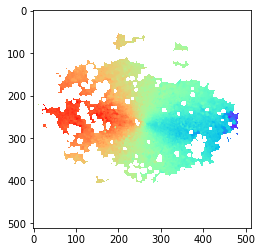

In [3]:
plt.imshow(Velmap,interpolation=None,cmap='rainbow')

In [4]:
X0,Y0 = 256, 256
i0 = 66
psi0 = 100
Vsys = 484
p_geo = [psi0,i0,X0,Y0,Vsys]

In [5]:
a =  VelocityMaps(Velmap,p_geo,beta=1,Err_map=1)

In [6]:
a.Geometry()

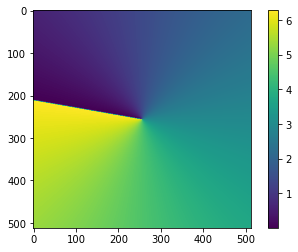

In [7]:
plt.imshow(a.psi)
plt.colorbar()

In [8]:
a.mask_angle(15)

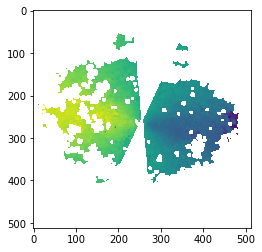

In [9]:
plt.imshow(a.Vp,interpolation=None)

In [10]:
a.deproject()

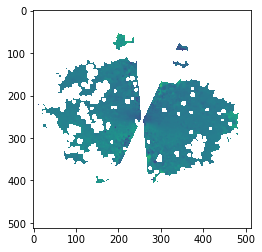

In [11]:
plt.imshow(a.Vc)

In [12]:
a.cloudy_rotation_curve()

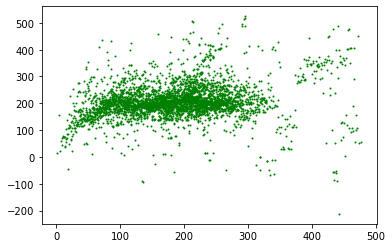

In [13]:
plt.plot(a.RC_all[::20,0],a.RC_all[::20,1],'.g',markersize=2)

In [14]:
a.bin_all_curves(binsize=10)

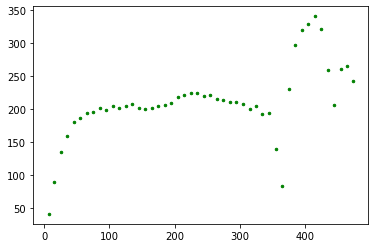

In [15]:
plt.plot(a.RC_all_bin[:,0],a.RC_all_bin[:,1],'.g',markersize=5)

In [23]:
Velmap = fits.open('/home/juan/PROYECTOS/PYKINEMETRY/Test/Fit_realvelmaps/ugc8334_rv_voro.fits')[0].data
a =  VelocityMaps(Velmap,p_geo,beta=1,Err_map=1)

In [24]:
a.Geometry()

In [25]:
a.get_index_slit(slit_width=6)

In [26]:
mapa = a.Vp.copy()
mapa[a.index_ls] = np.NaN

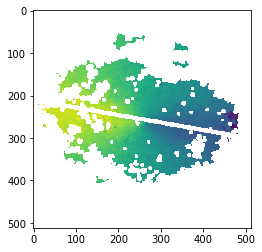

In [27]:
plt.imshow(mapa)

In [28]:
a.deproject()

In [30]:
RC_ls = a.sort_curve(a.r,a.Vc,a.sigmaVc,a.index_ls)

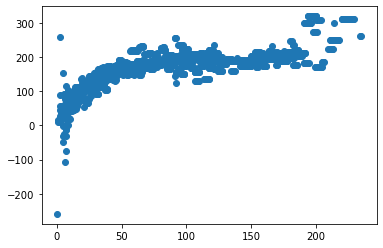

In [32]:
plt.plot(RC_ls[:,0],RC_ls[:,1],'o')

In [33]:
RC_ls_bin = a.bin_one_curve(RC_ls,binsize=5)

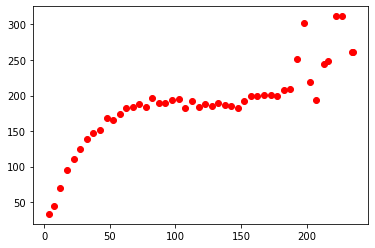

In [34]:
plt.plot(RC_ls_bin[:,0],RC_ls_bin[:,1],'or')